**Desafio: Realizar a analise exploratória dos dados de Fakes News**


In [ ]:
pip install pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [24]:
# importar a base de dados

import pandas as pd

tabela = pd.read_csv("data.csv")
display(tabela)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [26]:
# Entender as informações apresentadas na tabela

print(tabela.info())

# Excluir linhas vazias
tabela = tabela.dropna(how="any", axis=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      3988 non-null   object
 1   Headline  3988 non-null   object
 2   Body      3988 non-null   object
 3   Label     3988 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 155.8+ KB
None


In [27]:
#Analise Exploratória Geral

display(tabela["Label"].value_counts())
display(tabela["Label"].value_counts(normalize=True).map("{:.1%}".format))

0    2120
1    1868
Name: Label, dtype: int64

0    53.2%
1    46.8%
Name: Label, dtype: object

**ANALISE EXPLORATÓRIA DE NOTÍCIAS FAKES E NÃO FAKES**

O que analisar:

Quantidades de palavras em titulos de noticias fakes e não fakes (HeadLine x Label)

Palavras que mais aparecem em titulos de  noticias fakes news e não fakes news - Nuvens de palavras (HeadLine x Label)

Quantidades de palavras no corpo da noticias de fake nwes e não fakes (Body x Label)

Palavras que mais aparecem no corpo de noticias de fake news e não fakes - 
Nuvem de palavras (Baody x Label)

Sites que mais publicam fake News (URL X Label)


**ANALISE EXPLORATÓRIA SOMENTE DAS NOTÍCIAS FAKE NEWS**

In [28]:
# Separando os dados que são Fakes News

Fake_News = tabela[tabela['Label'] == 1]
display(Fake_News)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
3995,http://www.bbc.com/news/entertainment-arts-415...,Harvey Weinstein scandal: What next for Hollyw...,Image copyright Getty Images Image caption Har...,1
3999,https://www.reuters.com/article/us-baseball-ml...,Red Sox fire manager Farrell after five seasons,"FILE PHOTO: Oct 25, 2013; St. Louis, MO, USA; ...",1
4001,https://www.nytimes.com/2017/10/09/obituaries/...,"Hervé Leroux, Creator of the Hervé Léger Banda...","Mr. Leroux was born Hervé Peugnet on May 30, 1...",1
4002,http://www.cnn.com/videos/politics/2017/10/09/...,The price tag for Pence's trip to Indianapolis,Ethical questions loom after Vice President Mi...,1


In [29]:
# Entender as informações apresentadas na tabela

print(Fake_News.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 0 to 4007
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      1868 non-null   object
 1   Headline  1868 non-null   object
 2   Body      1868 non-null   object
 3   Label     1868 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 73.0+ KB
None


**1 - Contar quantas palavras tem nos titulos de noticias Fakes**

In [47]:
Fake_News['count_words_title'] = Fake_News['Headline'].apply(lambda x: len(x.split(' ')))
Fake_News['count_words_title'].value_counts()
display(Fake_News['count_words_title'].value_counts(normalize=True).map("{:.1%}".format))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


9     18.7%
10    17.4%
8     14.4%
11    11.7%
7     11.1%
12     7.8%
6      7.1%
13     3.9%
5      3.6%
14     1.8%
15     0.8%
4      0.8%
3      0.7%
17     0.1%
16     0.1%
2      0.1%
Name: count_words_title, dtype: object

**2 - Nuvem de palavras dos titulos de Fakes News**

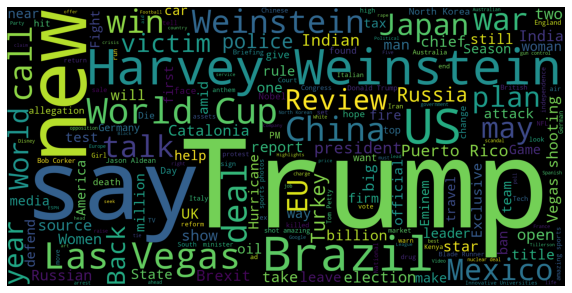

In [33]:
# concatenar as palavras
titulo = " ".join(t for t in Fake_News['Headline'])

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o"])
    
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(titulo)
    
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
    
plt.imshow(wordcloud);
wordcloud.to_file("titulos_Fake.png")


**3 - Contagem de palavras do Body das notícias Fake News**

In [37]:
Fake_News['count_words_body'] = Fake_News['Body'].apply(lambda x: len(x.split(' ')))
Fake_News['count_words_body'].value_counts()
display(Fake_News['count_words_body'].value_counts(normalize=True).map("{:.1%}".format))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


16      3.3%
25      0.6%
28      0.5%
27      0.5%
310     0.5%
        ... 
813     0.1%
2860    0.1%
811     0.1%
809     0.1%
2050    0.1%
Name: count_words_body, Length: 948, dtype: object

**4 - Nuvem de palavras do corpo das notícia Fake News**

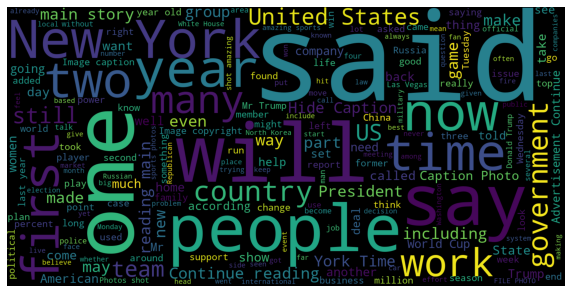

In [40]:
# concatenar as palavras
corpo = " ".join(t for t in Fake_News['Body'])
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(corpo)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("corpo_Fake.png")

**5 - Sites que mais publicam Fake News**

In [36]:
def get_domain_url(url):
    var1 = url.split('/')[:3]
    return '/'.join(var1)

Fake_News['url_domain'] = Fake_News['URLs'].apply(get_domain_url)
Fake_News.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,URLs,Headline,Body,Label,count_words_title,url_domain
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,7,http://www.bbc.com
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,10,https://www.reuters.com
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,8,https://www.nytimes.com
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,11,https://www.reuters.com
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,7,http://www.cnn.com


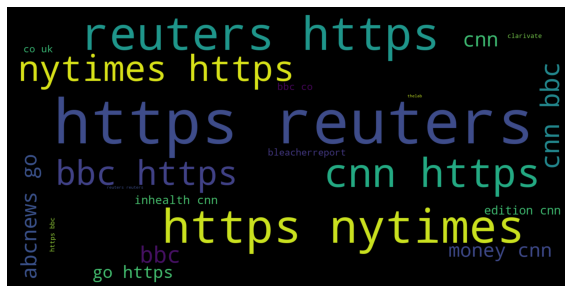

In [41]:
# concatenar as palavras
corpo = " ".join(t for t in Fake_News['url_domain'])
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(corpo)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("sites_Fake.png")

**ANALISE EXPLORATÓRIA SOMENTE DAS NOTÍCIAS REAL**

In [43]:
Real_News = tabela[tabela['Label'] == 0]
display(Real_News)

,URLs,Headline,Body,Label
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
10,https://www.activistpost.com/2017/09/u-s-presi...,U.S. President Donald Trump Quietly Signs Law ...,By Aaron Kesel\nAs former White House chief of...,0
11,http://beforeitsnews.com/sports/2017/10/2017-f...,2017 Fantasy Football Team Defense Rankings - ...,2017 Fantasy Football Team Defense Rankings – ...,0
12,http://beforeitsnews.com/sports/2017/09/just-s...,Just Shut Up & Play Some Damn Baseball!!,Just Shut Up & Play Some Damn Baseball!!\n(Bef...,0
14,http://beforeitsnews.com/sports/2017/10/107-ch...,"10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig...",A Potato Battery Can Light up a Room for Over ...,0
...,...,...,...,...
4000,https://www.activistpost.com/2017/09/false-arr...,35 False Matches and 1 Erroneous Arrest As Pol...,By Nicholas West\nAll things biometric are swe...,0
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,CNN and Globalist Exposed - Steve Quayle and A...,"Vietnam Is in Great Danger, You Must Publish a...",0
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0


In [44]:
# Entender as informações apresentadas na tabela

print(Real_News.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 5 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      2120 non-null   object
 1   Headline  2120 non-null   object
 2   Body      2120 non-null   object
 3   Label     2120 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 82.8+ KB
None


**1 - Contar quantas palavras tem nos titulos de noticias Reais**

In [46]:
Real_News['count_words_title_Real'] = Real_News['Headline'].apply(lambda x: len(x.split(' ')))
Real_News['count_words_title_Real'].value_counts()
display(Real_News['count_words_title_Real'].value_counts(normalize=True).map("{:.1%}".format))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


11     12.2%
10     11.2%
9      10.6%
8       9.4%
12      9.4%
7       6.7%
6       5.8%
5       5.8%
13      5.7%
14      4.2%
15      4.1%
17      2.6%
16      2.4%
4       2.3%
18      1.7%
20      1.7%
3       1.2%
2       1.1%
19      0.7%
22      0.5%
1       0.4%
32      0.1%
73      0.0%
26      0.0%
21      0.0%
110     0.0%
46      0.0%
Name: count_words_title_Real, dtype: object

**2 - Nuvem de palavras dos titulos de Real News**

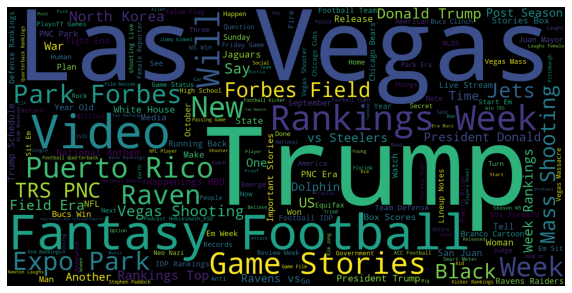

In [48]:
# concatenar as palavras
titulo = " ".join(t for t in Real_News['Headline'])

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o"])
    
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(titulo)
    
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
    
plt.imshow(wordcloud);
wordcloud.to_file("titulos_Real.png")

**3 - Contagem de palavras do Body das notícias Real News**

In [49]:
Real_News['count_words_body_Real'] = Real_News['Body'].apply(lambda x: len(x.split(' ')))
Real_News['count_words_body_Real'].value_counts()
display(Real_News['count_words_body_Real'].value_counts(normalize=True).map("{:.1%}".format))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


26    10.7%
31     6.7%
24     5.6%
15     4.4%
21     1.4%
      ...  
57     0.0%
75     0.0%
83     0.0%
95     0.0%
14     0.0%
Name: count_words_body_Real, Length: 726, dtype: object

**4 - Nuvem de palavras do corpo das notícia Real News**

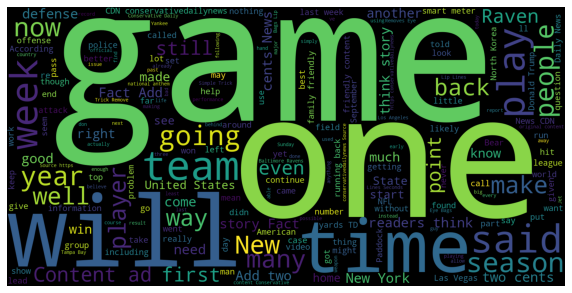

In [50]:
# concatenar as palavras
corpo = " ".join(t for t in Real_News['Body'])
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(corpo)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("corpo_Fake_Real.png")

**5 - Sites que mais publicam Fake News**

In [51]:
def get_domain_url(url):
    var1 = url.split('/')[:3]
    return '/'.join(var1)

Real_News['url_domain'] = Real_News['URLs'].apply(get_domain_url)
Real_News.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,URLs,Headline,Body,Label,count_words_title_Real,count_words_body_Real,url_domain
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0,5,98,http://beforeitsnews.com
10,https://www.activistpost.com/2017/09/u-s-presi...,U.S. President Donald Trump Quietly Signs Law ...,By Aaron Kesel\nAs former White House chief of...,0,18,630,https://www.activistpost.com
11,http://beforeitsnews.com/sports/2017/10/2017-f...,2017 Fantasy Football Team Defense Rankings - ...,2017 Fantasy Football Team Defense Rankings – ...,0,9,80,http://beforeitsnews.com
12,http://beforeitsnews.com/sports/2017/09/just-s...,Just Shut Up & Play Some Damn Baseball!!,Just Shut Up & Play Some Damn Baseball!!\n(Bef...,0,8,717,http://beforeitsnews.com
14,http://beforeitsnews.com/sports/2017/10/107-ch...,"10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig...",A Potato Battery Can Light up a Room for Over ...,0,13,31,http://beforeitsnews.com


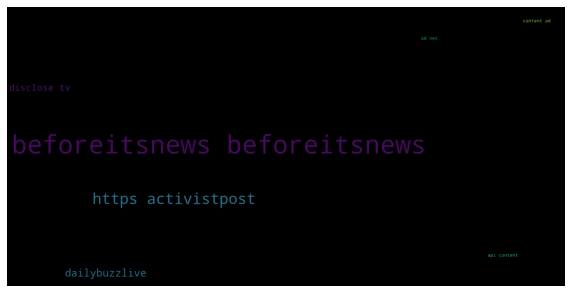

In [52]:
# concatenar as palavras
corpo = " ".join(t for t in Real_News['url_domain'])
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(corpo)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("sites_Fake_Real.png")

**Conclusões**

Os titulos das notícias que são Fakes News possuem na sua maioria titulos com até 9 ou 10 palavras, enquanto as noticías que são reais os titulos apresentam em sua maioria 10 ou 11 palavras:

- É provavél que exista uma quantidade minima e maxíma de palavras que possam ser colocadas em notícias no geral?

Noticias que são Fakes em sua maioria são matérias que envolvem Governos mundiais e o ex presidente dos Estados Unidos Donald Trump, das palavras que mais são citadas em Fakes News temos: Trump; Hanvey; China; Las Vegas; Japam;
Já em noticias que são reais, envolvem assuntos mais gerais como esportes e temas de entretenimento, das palavras mais citadas temos: Trump; Las Vegas; Vídeo; Fantasy; Football; Ranking; Puerto Rico.

- É necessário que exploremos mais a fundo as noticias e em que contexto elas estão usando as palavras mais citadas.

O corpo do das noticías que são Fakes News geralmente possuem na sua maioria 16 palavras, enquanto as notícias reais possuem na maioria das notícias 26 palavras.

- É necessário uma analise mais aprofundada das notícias que estão contidas na base.

Em relação as palavras que são citadas no corpo das noticias que são Fake temos: One; Said; New Yourk; People; Say; Government, provavélmente essas palavras podem está ligadas a notícias que envolvem o governo ou orgãos governamentais. Em notícias reais as palavras que mais estão presentes no corpo da notícia temos: One; Game; Play; Week; Time; Going.

- É importante que vejamos as traduções destas palavras e em que contextos elas se encontram para termos uma base mais realista sobre o que o assunto está tratando.

Entre os sites que mais publicam Fake News temos Reuters, BBC, Nytimes, CNN, esses são sites de repercurção internacional. Entre os que mais publicam notícias reais temos Befoneitsnews e Activistpost.

- Precisamos entender as variaveis que estão em Label se consideramos 0 - como noticias verdadeiras e 1 - noticias falsas, pois os sites que mais publicam fake news tem uma repercurssão mundial o que é estranho serem os sites que mais publicam noticias fakes.